In [1]:
!pip install matplotlib -q


In [2]:
!pip install scikit-learn -q

In [3]:
from tensorflow.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("trainingdata.csv")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X=data[['xBx', 'yBx', 'zBx', 'xBy', 'yBy', 'zBy', 'xBz', 'yBz', 'zBz',"|Bx+Bz|","|By+Bz|","|Bz|", "Res"]]
X=data[["|Bx+Bz|","|By+Bz|","|Bz|", "Res"]]
y = data[["X","Y","Z"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size = 0.3, shuffle=True)
scaler = preprocessing.StandardScaler().fit(X_train)

Inference with model trained on 4 features

In [6]:
#loading pre-trained model
model=load_model('model4feats.h5')

In [12]:
#loading data
data=pd.read_csv('data2.csv')
x_test = data[["|Bx+Bz|","|By+Bz|","|Bz|","Res"]]

In [13]:
x_scaled_test = scaler.transform(x_test)

In [14]:
#run this section if your data already has output values
y_test = data[["X","Y","Z"]]

x_scaled_test = scaler.transform(x_test)

_, accuracy = model.evaluate(x_scaled_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

y_pred=model.predict(x_scaled_test)

KeyError: "None of [Index(['X', 'Y', 'Z'], dtype='object')] are in the [columns]"

In [15]:
#run this section if you want to predict unknown X,Y,Z, i.e. you don't already have the output values
y_pred=model.predict(x_scaled_test)

1/1 [==============================] - 0s 21ms/step


In [16]:
#calculating errors
import numpy as np
res=pd.DataFrame()
#res[['X','Y','Z']]=y_test
res[['Xpred','Ypred','Zpred']]=y_pred
#res[['Xerror', 'Yerror', 'Zerror']]=np.subtract(y_pred,y_test)
# res['N']=NEW_Test['N'].tolist()
#res['TotalError']=res.apply(lambda row: np.sqrt(row['Xerror']*row['Xerror'] + row['Yerror']*row['Yerror']+ row['Zerror']*row['Zerror']), axis=1)

In [18]:
#generating a document with prediction results
spool=res[['Zpred','Ypred','Xpred']]
spool.to_csv('inference_results_dat2.csv')

In [ ]:
##plots
#X error vs X
plt.scatter(res['X'],res['Xerror'])

KeyError: 'X'

In [ ]:
#Y error vs Y
plt.scatter(res['Y'],res['Yerror'])

In [ ]:
#Z error vs Z
plt.scatter(res['Z'],res['Zerror'])

Inference with model trained on all features

In [ ]:
#loading pre-trained model
model=load_model('modelallfeats.h5')

In [ ]:
#loading data
data=pd.read_csv('bending1_250ma.csv')
data.columns


Index(['|Bz|', '|Bx+Bz|', '|By+Bz|', 'Res'], dtype='object')

In [ ]:
x_test = data[['xBx', 'yBx', 'zBx', 'xBy', 'yBy', 'zBy', 'xBz', 'yBz', 'zBz',"|Bx+Bz|","|By+Bz|","|Bz|", "Res"]]

In [ ]:
#run this section if your data already has output values
y_test = data[["X","Y","Z"]]

x_scaled_test = scaler.transform(x_test)

_, accuracy = model.evaluate(x_scaled_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

y_pred=model.predict(x_scaled_test)

19/19 [==============================] - 0s 1ms/step - loss: 0.1246 - accuracy: 1.0000
Accuracy: 100.00
19/19 [==============================] - 0s 1ms/step


In [ ]:
#run this section if you want to predict unknown X,Y,Z, i.e. you don't already have the output values
y_pred=model.predict(x_scaled_test)

19/19 [==============================] - 0s 1ms/step


In [ ]:
#calculating errors
import numpy as np
res=pd.DataFrame()
res[['X','Y','Z']]=y_test
res[['Xpred','Ypred','Zpred']]=y_pred
res[['Xerror', 'Yerror', 'Zerror']]=np.subtract(y_pred,y_test)
# res['N']=NEW_Test['N'].tolist()
res['TotalError']=res.apply(lambda row: np.sqrt(row['Xerror']*row['Xerror'] + row['Yerror']*row['Yerror']+ row['Zerror']*row['Zerror']), axis=1)

In [ ]:
#generating a document with prediction results
spool=res[['Z','Y','X','Zpred','Ypred','Xpred', 'Xerror', 'Yerror', 'Zerror', 'TotalError']]
spool.to_csv('inference_results_250ma_bending4.csv')

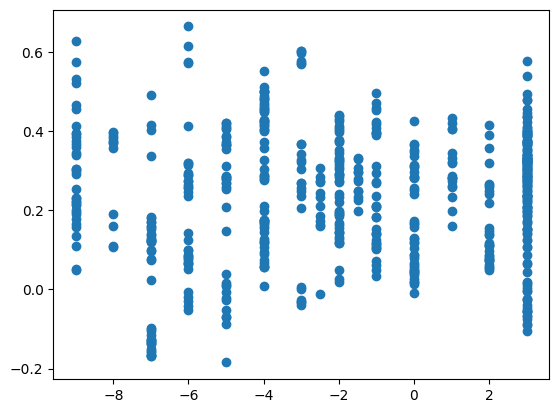

In [ ]:
##plots
#X error vs X
plt.scatter(res['X'],res['Xerror'])

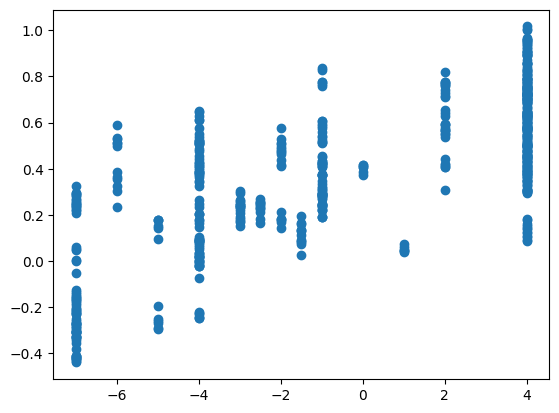

In [ ]:
#Y error vs Y
plt.scatter(res['Y'],res['Yerror'])

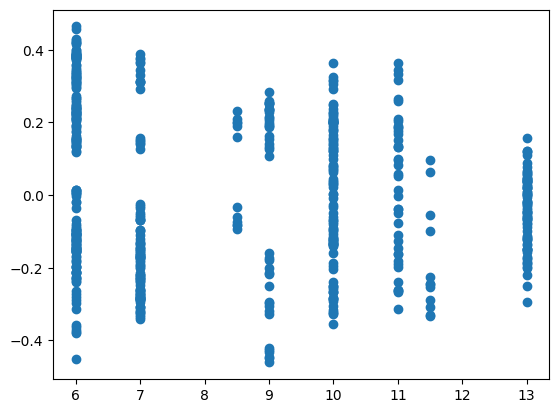

In [ ]:
#Z error vs Z
plt.scatter(res['Z'],res['Zerror'])